# Trabajo Practico Nº1 - Parte 2: Hilos

## Información General

* **Universidad Nacional de la Matanza**
* Materia: Programación Concurrente
* Cuatrimestre: Segundo Cuatrimestre, Año 2024
* Profesores:
    * ADAGIO, MATIAS EZEQUIEL
    * CARNUCCIO, ESTEBAN
    * HIRSCHFELDT, DARIO
    * PALOMO, MAXIMO FACUNDO
    * VOLKER MARIANO LEONARDO
* Grupo: M4


* Integrantes:
    * ANTONIOLI, IVÁN OSCAR
    * DI NICCO, LUIS DEMETRIO
    * SANDOVAL VASQUEZ, JUAN LEANDRO
    * TIGANI MARTIN SEBASTIAN
    * VILLCA, LUIS ALBERTO

## Consigna

**Fecha de entrega**: 18/09/2024

**Forma de entrega**:
Se debe generar un informe que contenga los siguientes puntos:

*   **Carátula**: Con los integrantes del grupo.
*   **Link a un repositorio de GitHub**: En donde se encuentre el archivo del cuaderno de Colab generado para este Trabajo Práctico. Este archivo debe ser con la extension ipynb. También se debe subir a GitHub el código fuente.
*   **Conclusiones**: En esta sección se debe describir las dificultadas que encontraron al realizar el trabajo práctico.

Entregar el informe por plataforma de MIeL. Este debe ser en formato .pdf, con nombre TP1_NumeroDelGrupo.pdf.

**Enunciado**:

a) Crear un programa en C++, Python y Java que contabilice la cantidad de caracteres de un archivo de texto implementando threads.

El programa recibirá como parámetro el path al archivo de texto y un parámetro N que será la cantidad de threads a crear.

Cada thread contabilizará la cantidad de caracteres de la/s línea/s  que le corresponde/n analizar y almacenará el resultado en RP (Resultado Parcial), existiendo N RP.

Por último, el hilo principal sumará los resultados parciales generando un RT (Resultado Total) y lo imprimirá por pantalla, así como también el tiempo insumido por el procesamiento.

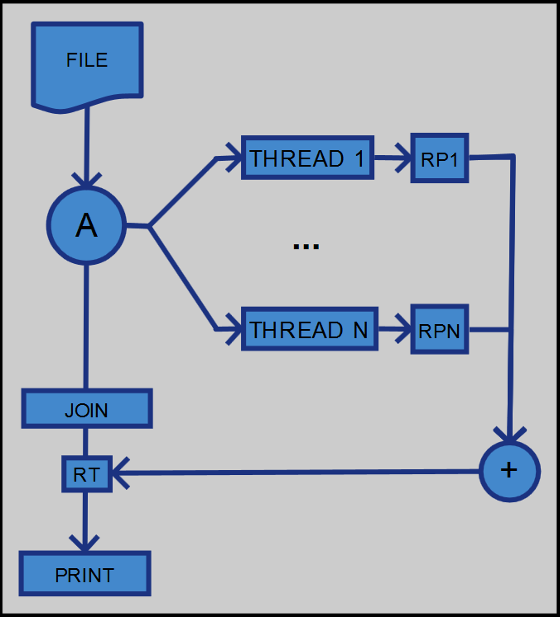

b) Realizar una toma de tiempos (milisegundos) con los programas del punto anterior generando una tabla comparativa entre lenguajes y emitir conclusiones.

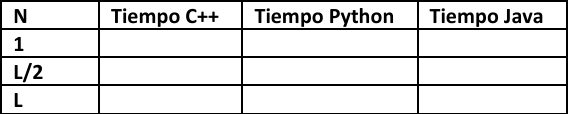

L: Líneas no vacías del archivo de texto.

## Criterios a tener en cuenta

* [Coding Standard](https://google.github.io/styleguide/)
* Ajustes específicos (Ej. llaves en la misma columna)
* Espacios en lugar de tabulaciones (2 espacios)
* Métodos/funciones con menos de 15 líneas.
* Patrones de diseño
* No debe haber números mágicos, uso de constantes descriptivas.

# Resolución

## Contador de Carácteres en Java

### Código

#### Clase Hilo

In [37]:
%%writefile Hilo.java
import java.util.List;

public class Hilo extends Thread
{
  public static final int TIEMPO_ESPERA = 20000;

  int numero;
  int indiceInferior;
  int indiceSuperior;
  int[] vectorSumaParcial;
  List<String> listaLineas;

  public Hilo(int numero,List<String> listaLineas,int indiceInferior,int indiceSuperior,int[] vectorSumaParcial)
  {
    this.numero=numero;
    this.indiceInferior=indiceInferior;
    this.indiceSuperior=indiceSuperior;
    this.listaLineas=listaLineas;
  }

  public void run()
  {
    this.contadorCaracteresEnRango(listaLineas, this.indiceInferior, this.indiceSuperior,vectorSumaParcial);
    try
    {
      Thread.sleep(TIEMPO_ESPERA);
    }
    catch (InterruptedException ie)
    {
      return;
    }
  }

  private void contadorCaracteresEnRango(List<String> lineas, int inicio, int fin,int[] vectorSumaParcial)
  {
    for (int i = inicio; i <= fin; i++)
    {
      Main.setValorVector(numero,lineas.get(i).length());
    }
  }
}

Overwriting Hilo.java


#### Clase ProcesadorArchivo

In [29]:
%%writefile ProcesadorArchivo.java
import java.io.File;
import java.io.IOException;
import java.util.List;
import java.util.Scanner;

public class ProcesadorArchivo
{
  public static void eliminarLineasVacias(String archivoOriginal, List<String> listaLineas)
  {
    File archivo = null;
    Scanner sc = null;
    try
    {
      archivo = new File(archivoOriginal);
      sc = new Scanner(archivo);
      String linea;
      while (sc.hasNext())
      {
        linea=sc.nextLine();
        if (!linea.isEmpty())
        {
          listaLineas.add(linea);
        }
      }
    }
    catch (IOException e)
    {
      System.err.println("Error al abrir el archivo de entrada.");
      e.printStackTrace();
    }
    sc.close();
  }
}


Overwriting ProcesadorArchivo.java


#### Clase Main

In [30]:
%%writefile Main.java
import java.util.List;
import java.util.ArrayList;

public class Main
{
  static int[] vectorSumaParcial;

  public static void setValorVector(int i,int valor)
  {
    vectorSumaParcial[i]+=valor;
  }

  public static void main(String[] args)
  {
    if (args.length != 2)
    {
      System.err.println("Uso: java Main <archivo> <numero de threads>");
      System.exit(1);
    }
    long start = System.nanoTime();

    String nombreArchivo = args[0];
    int cantidadDeHilos = Integer.parseInt(args[1]);

    List<String> listaLineas = new ArrayList<>();
    ProcesadorArchivo.eliminarLineasVacias(nombreArchivo, listaLineas);

    if (listaLineas.size() < cantidadDeHilos)
    {
      System.out.println("La cantidad de hilos supera la cantidad de lineas no vacias del archivo");
      System.exit(1);
    }

    int cantidadLineasPorThread=listaLineas.size()/cantidadDeHilos;
    Hilo[] hilos = new Hilo[cantidadDeHilos];
    Main.vectorSumaParcial= new int[cantidadDeHilos];

    for (int i = 0; i < cantidadDeHilos; i++)
    {
      int indiceInferior = i*cantidadLineasPorThread;
      int indiceSuperior = ((i+1)*cantidadLineasPorThread) - 1;

      if(i == cantidadDeHilos-1 && (listaLineas.size() % cantidadDeHilos != 0))
      {
        indiceSuperior += (listaLineas.size() % cantidadDeHilos);
      }
      hilos[i]= new Hilo(i,listaLineas,indiceInferior,indiceSuperior,vectorSumaParcial);
      hilos[i].start();
    }

    for (int i = 0; i < cantidadDeHilos; i++)
    {
      try
      {
        hilos[i].join();
      }
      catch (InterruptedException e)
      {
        e.printStackTrace();
      }
    }
    int total=0;
    for (int i = 0; i < vectorSumaParcial.length; i++)
    {
      total+=vectorSumaParcial[i];
    }
    System.out.println("Total de Caracteres: " +  total);
    long end = System.nanoTime();
    double duracionMs = (end - start) / 1_000_000.0;

    System.out.println("Tiempo de ejecucion: " + duracionMs + " ms");
  }
}

Overwriting Main.java


### Compilación

In [31]:
!javac Main.java ProcesadorArchivo.java Hilo.java

### Ejecución

#### Ejecucion en segundo plano

***Nota***: Si desea cambair la cantidad de hilos modifique el valor que aparece luego de "./test.txt"

!nohup ./contarCaracteres ./test.txt X 1> salidaJava++.txt 2>/dev/null &

Cambie la X por la cantidad de hilos que desee. El archivo test.txt tiene 4 lineas no vacias, por lo que puede soportar hasta 4 hilos. En caso de querer generar mas hilos recomendamos que use el archivo "archivoLargoLinea.txt"

In [34]:
!nohup java Main ./test.txt 4 1>salidaJava.txt 2>/dev/null &

## Visualización de los hilos generados

### PID del proceso principal

***Nota***: Seleccionar el PID que sigue el siguiente formato:

root        XXXX       1  3 18:31 ?        00:00:00 java Main ./test.txt 4

Reemplazar el PID de la celda de abajo por el valor que esta en la posicion "XXXX"

In [35]:
!ps -ef | grep java

root        1698     344  0 04:40 ?        00:00:00 /bin/bash -c ps -ef | grep java
root        1700    1698  0 04:40 ?        00:00:00 grep java


### Hilos generados

***Nota***: Completar el PID con el valor obtenido en la celda de arriba

In [36]:
!ps -L -p 1055

    PID     LWP TTY          TIME CMD


### Salida

***Nota***: Se debe esperar a que finalice la ejecucion en segundo plano. Originalmente pusimos un sleep de 20 segundos.

In [20]:
!cat salidaJava.txt

## Mediciones de Tiempo

Codigo sin el tiempo de espera para una medicion del tiempo de ejecucion mas precisa.

### Contador de Carácteres en Java

#### Clase Hilo

In [40]:
%%writefile Hilo.java
import java.util.List;

public class Hilo extends Thread
{
  int numero;
  int indiceInferior;
  int indiceSuperior;
  int[] vectorSumaParcial;
  List<String> listaLineas;

  public Hilo(int numero,List<String> listaLineas,int indiceInferior,int indiceSuperior,int[] vectorSumaParcial)
  {
    this.numero=numero;
    this.indiceInferior=indiceInferior;
    this.indiceSuperior=indiceSuperior;
    this.listaLineas=listaLineas;
  }

  public void run()
  {
    this.contadorCaracteresEnRango(listaLineas, this.indiceInferior, this.indiceSuperior,vectorSumaParcial);
  }

  private void contadorCaracteresEnRango(List<String> lineas, int inicio, int fin,int[] vectorSumaParcial)
  {
    for (int i = inicio; i <= fin; i++)
    {
      Main.setValorVector(numero,lineas.get(i).length());
    }
  }
}

Overwriting Hilo.java


#### Clase ProcesadorArchivo

In [41]:
%%writefile ProcesadorArchivo.java
import java.io.File;
import java.io.IOException;
import java.util.List;
import java.util.Scanner;

public class ProcesadorArchivo
{
  public static void eliminarLineasVacias(String archivoOriginal, List<String> listaLineas)
  {
    File archivo = null;
    Scanner sc = null;
    try
    {
      archivo = new File(archivoOriginal);
      sc = new Scanner(archivo);
      String linea;
      while (sc.hasNext())
      {
        linea=sc.nextLine();
        if (!linea.isEmpty())
        {
          listaLineas.add(linea);
        }
      }
    }
    catch (IOException e)
    {
      System.err.println("Error al abrir el archivo de entrada.");
      e.printStackTrace();
    }
    sc.close();
  }
}


Overwriting ProcesadorArchivo.java


#### Clase Main

In [42]:
%%writefile Main.java
import java.util.List;
import java.util.ArrayList;

public class Main
{
  static int[] vectorSumaParcial;

  public static void setValorVector(int i,int valor)
  {
    vectorSumaParcial[i]+=valor;
  }

  public static void main(String[] args)
  {
    if (args.length != 2)
    {
      System.err.println("Uso: java Main <archivo> <numero de threads>");
      System.exit(1);
    }
    long start = System.nanoTime();

    String nombreArchivo = args[0];
    int cantidadDeHilos = Integer.parseInt(args[1]);

    List<String> listaLineas = new ArrayList<>();
    ProcesadorArchivo.eliminarLineasVacias(nombreArchivo, listaLineas);

    if (listaLineas.size() < cantidadDeHilos)
    {
      System.out.println("La cantidad de hilos supera la cantidad de lineas no vacias del archivo");
      System.exit(1);
    }

    int cantidadLineasPorThread=listaLineas.size()/cantidadDeHilos;
    Hilo[] hilos = new Hilo[cantidadDeHilos];
    Main.vectorSumaParcial= new int[cantidadDeHilos];

    for (int i = 0; i < cantidadDeHilos; i++)
    {
      int indiceInferior = i*cantidadLineasPorThread;
      int indiceSuperior = ((i+1)*cantidadLineasPorThread) - 1;

      if(i == cantidadDeHilos-1 && (listaLineas.size() % cantidadDeHilos != 0))
      {
        indiceSuperior += (listaLineas.size() % cantidadDeHilos);
      }
      hilos[i]= new Hilo(i,listaLineas,indiceInferior,indiceSuperior,vectorSumaParcial);
      hilos[i].start();
    }

    for (int i = 0; i < cantidadDeHilos; i++)
    {
      try
      {
        hilos[i].join();
      }
      catch (InterruptedException e)
      {
        e.printStackTrace();
      }
    }
    int total=0;
    for (int i = 0; i < vectorSumaParcial.length; i++)
    {
      total+=vectorSumaParcial[i];
    }
    System.out.println("Total de Caracteres: " +  total);
    long end = System.nanoTime();
    double duracionMs = (end - start) / 1_000_000.0;

    System.out.println("Tiempo de ejecucion: " + duracionMs + " ms");
  }
}

Overwriting Main.java


#### Compilacion

In [43]:
!javac Main.java ProcesadorArchivo.java Hilo.java

### Archivo test.txt

L = cantidad de lineas = 4

1 solo hilo

In [45]:
!java Main ./test.txt 1

Total de Caracteres: 180
Tiempo de ejecucion: 78.955439 ms


L/2 = 2 hilos

In [ ]:
!java Main ./test.txt 2

Total de Caracteres: 180
Tiempo de ejecucion: 121.931582 ms


L = 4 hilos

In [ ]:
!java Main ./test.txt 4

Total de Caracteres: 180
Tiempo de ejecucion: 78.012499 ms


### Archivo archivoLineasVacias.txt

L = cantidad de lineas = 5

1 solo hilo

In [ ]:
!java Main ./archivoLineasVacias.txt 1

Total de Caracteres: 20
Tiempo de ejecucion: 70.231393 ms


L/2 = 2 hilos

In [ ]:
!java Main ./archivoLineasVacias.txt 2

Total de Caracteres: 20
Tiempo de ejecucion: 128.659791 ms


L = 5 hilos

In [ ]:
!java Main ./archivoLineasVacias.txt 5

Total de Caracteres: 20
Tiempo de ejecucion: 82.263161 ms


### Archivo archivoLargoLinea.txt

L = cantidad de lineas = 504

1 solo hilo

In [ ]:
!java Main ./archivoLargoLinea.txt 1

Total de Caracteres: 504000
Tiempo de ejecucion: 172.624455 ms


L/2 = 252 hilos

In [ ]:
!java Main ./archivoLargoLinea.txt 252

Total de Caracteres: 504000
Tiempo de ejecucion: 246.414266 ms


L = 504 hilos

In [ ]:
!java Main ./archivoLargoLinea.txt 504

Total de Caracteres: 504000
Tiempo de ejecucion: 291.933994 ms


### Archivo archivoGrande.txt

L = cantidad de lineas no vacias = 101950

1 solo hilo

In [ ]:
!java Main archivoGrande.txt 1

Total de Caracteres: 6575022
Tiempo de ejecucion: 792.562773 ms


2 Hilos

In [ ]:
!java Main archivoGrande.txt 2

Total de Caracteres: 6575022
Tiempo de ejecucion: 692.461325 ms


4 Hilos

In [ ]:
!java Main archivoGrande.txt 4

Total de Caracteres: 6575022
Tiempo de ejecucion: 652.766297 ms


16 Hilos

In [ ]:
!java Main archivoGrande.txt 1

Total de Caracteres: 6575022
Tiempo de ejecucion: 941.000364 ms


100 Hilos

In [ ]:
!java Main archivoGrande.txt 100

Total de Caracteres: 6575022
Tiempo de ejecucion: 691.014154 ms


1000 Hilos

In [ ]:
!java Main archivoGrande.txt 1000

Total de Caracteres: 6575022
Tiempo de ejecucion: 915.957034 ms


L/2 = 50975 hilos

In [ ]:
!java Main archivoGrande.txt 50975

Total de Caracteres: 6575022
Tiempo de ejecucion: 8764.219578 ms


L = 101950 hilos

In [ ]:
 !java Main archivoGrande.txt 101950

Total de Caracteres: 6575022
Tiempo de ejecucion: 17270.552939 ms
